In [1]:
import pandas as pd
import numpy as np
import sklearn
import concurrent.futures
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import pickle as pkl
import h5py
import time
import gc

In [2]:
RANDOM_STATE = 42

In [45]:
lstm_embedding_scores = pkl.load(open('./Model_Scores/lstm_embedding_scores.p', 'rb'))
mlp_embedding_scores = pkl.load(open('./Model_Scores/mlp_embedding_scores.p', 'rb'))
lstm_scores = pkl.load(open('./Model_Scores/lstm_scores.p', 'rb'))
mlp_scores = pkl.load(open('./Model_Scores/mlp_scores.p', 'rb'))

In [47]:
scores_df = pd.DataFrame(columns=['Num_Care_Events', 'Model', 'Score'])

# input all feed-forward neural network scores into dataframe
for key, value in mlp_scores.items():
    for i in range(5):
        d = {
            'Num_Care_Events': key,
            'Model': 'Feed-Forward Neural Network',
            'Score': value['mlp'][i]
        }
        scores_df = scores_df.append(d, ignore_index=True)
        
        
# input all mlp with autoencoder embedding scores into dataframe
for key, value in mlp_embedding_scores.items():
    for i in range(5):
        d = {
            'Num_Care_Events': key,
            'Model': 'Feed-Forward Neural Network w/ Autoencoder Embedding',
            'Score': value['mlp_embedding'][i]
        }
        scores_df = scores_df.append(d, ignore_index=True)

# input all LSTM scores into dataframe
for key, value in lstm_scores.items():
    for i in range(5):
        d = {
            'Num_Care_Events': key,
            'Model': 'LSTM',
            'Score': value['lstm'][i]
        }
        scores_df = scores_df.append(d, ignore_index=True)
# input all LSTM with autoencoder embedding scores into dataframe
for key, value in lstm_embedding_scores.items():
    for i in range(5):
        d = {
            'Num_Care_Events': key,
            'Model': 'LSTM w/ Autoencoder Embedding',
            'Score': value['lstm_embedding'][i]
        }
        scores_df = scores_df.append(d, ignore_index=True)

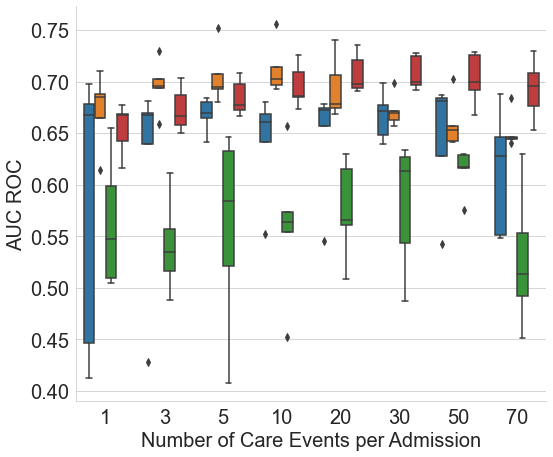

In [152]:
sns.catplot(x="Num_Care_Events", y="Score", hue="Model", 
            data=scores_df, 
            kind="box", 
            height=6, 
            aspect=1.2, 
            width=0.75,
            legend=False
           )
plt.ylabel('AUC ROC', fontsize=20)
plt.xlabel('Number of Care Events per Admission', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);
#plt.legend(fontsize=13, frameon=True, loc="lower right", framealpha=0.5);

In [49]:
average_scores = scores_df.groupby(['Model', 'Num_Care_Events']).mean().reset_index()

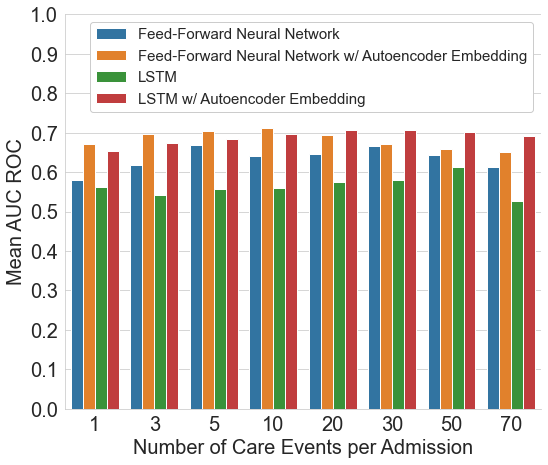

In [141]:
sns.catplot(x="Num_Care_Events", y="Score", hue="Model", 
            data=average_scores, 
            kind="bar", 
            height=6, 
            aspect=1.2,
            legend=False)

plt.ylabel('Mean AUC ROC', fontsize=20)
plt.xlabel('Number of Care Events per Admission', fontsize=20)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=15, frameon=True, loc="upper right", framealpha=1);